In [1]:
%matplotlib inline
# %matplotlib widget # 跟圖互動，可以用點選圖片中的某位置觸發程式
# %env KERAS_BACKEND=tensorflow
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, IntSlider, Button
from ipywidgets import interact_manual

In [2]:
# generate data
def generate_data(len_of_data, dim = 2):
    xs = 2*(np.random.rand(1) + 1)*(np.random.rand(len_of_data, dim)-1) + np.random.randint(10, size=(dim,))-5

    means = np.mean(xs, axis=0)
    normal_vector = np.tan((np.random.rand(dim)-0.5)*np.pi)
    if dim == 2:
        if round(normal_vector[1],2) == 0.:
            normal_vector[1]=0.1
    bias = np.dot(normal_vector, means)
    labels = np.sign(np.matmul(xs, normal_vector) - bias)

    if dim == 2:
        print("data:")
        plt.scatter(xs[:, 0], xs[:, 1], c=labels) #, cmap="Set2")
        x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
        plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
        # plt.colorbar()
        plt.show()
    return (xs, labels)

In [3]:
def PLA(xs,labels, history_draw = True, epochs = 10000):
    len_of_data, dim = xs.shape
    w = np.random.randint(5, size=(dim+1,)).astype(float)

    # xls means x with label
    xls = np.zeros((len_of_data, xs.shape[1]+1))
    xls[:, 1:] = xs.copy()
    xls[:, 0] = labels.copy()

    stop = False
    for epoch in range(epochs):
    #     for idx in [idx1 for idx1 in range(len_of_data) if np.sign(np.dot(xls[idx1], w)) != xls[idx1,0]]:
    #         idx
    #         break
        shuffle = np.arange(len_of_data)
        np.random.shuffle(shuffle)
        for idx in range(len_of_data):
            sidx = shuffle[idx]
            if np.sign(np.dot(xls[sidx,1:], w[1:]) + w[0]) != xls[sidx,0]:
                w[1:] = w[1:] + xls[sidx,0] * xls[sidx,1:]
                w[0] += xls[sidx,0]
                if dim == 2 and history_draw and epoch%(int(epochs/10))==0:
                    print("epoch = ", epoch)
                    print(w)
                    plt.scatter(xls[:, 1], xls[:, 2], c=xls[:,0])
                    x = np.linspace(min(xls[:, 1])-0.1, max(xls[:, 1])+0.1, 2)
                    # plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
                    if round(w[2],2) == 0.:
                        plt.plot(x, -1 * (x * w[1] + w[0])/0.1)
                    else:
                        plt.plot(x, -1 * (x * w[1] + w[0])/w[2])
                    # plt.colorbar()
                    plt.show()
                break
            if idx == len_of_data-1:
                stop = True
        if stop:
            break

    print("\nFinal  , epoch = ", epoch-1)
    if dim == 2 and history_draw:
        plt.scatter(xls[:, 1], xls[:, 2], c=xls[:,0])
        x = np.linspace(min(xls[:, 1])-0.1, max(xls[:, 1])+0.1, 2)
        # plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
        if round(w[2],2) == 0.:
            plt.plot(x, -1 * (x * w[1] + w[0])/0.1)
        else:
            plt.plot(x, -1 * (x * w[1] + w[0])/w[2])
        # plt.colorbar()
        plt.show()
    return w

data:


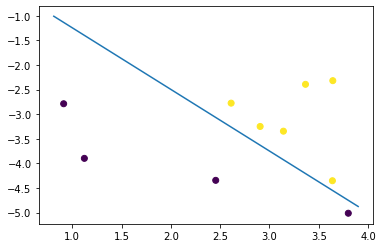

epoch =  0
[2.         0.20074186 8.01401332]


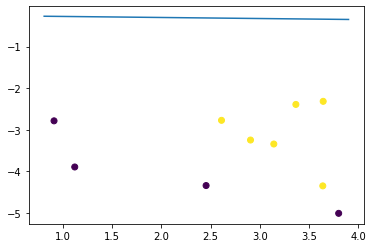


Final  , epoch =  13


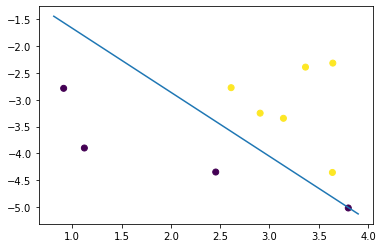

In [4]:
xs, labels = generate_data(10)
w = PLA(xs, labels)

In [5]:
xs_0, labels_0 = generate_data(10, dim=3)
w_0 = PLA(xs_0, labels_0)
len_of_data, dim = xs_0.shape
for idx in range(len_of_data):
    print(idx, np.sign(np.dot(xs_0[idx], w_0[1:]) + w_0[0]) != labels_0[idx])


Final  , epoch =  600
0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
